In [514]:

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
import matplotlib.lines as mlines

import seaborn as sns


from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [12]:
from sklearn.ensemble import RandomForestClassifier
machine_learning_model = RandomForestClassifier()

X = load_some_dataset10('dataold15_version5.csv')
y = X['column']

machine_learning_model.fit(X, y)

NameError: name 'load_some_dataset10' is not defined

In [522]:
# Determine the roc curve and the auc and display
def calc_roc(probs, y_test):
  # Calculate the area under the roc curve
  auc = roc_auc_score(y_test, probs)
  # Calculate metrics for the roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  
  plt.style.use('bmh')
  plt.figure(figsize = (8, 8))
  
  # Plot the roc curve
  plt.plot(fpr, tpr, 'b')
  plt.xlabel('False Positive Rate', size = 16)
  plt.ylabel('True Positive Rate', size = 16)
  plt.title('Receiver Operating Characteristic Curve, AUC = %0.4f' % auc, 
            size = 18)
  

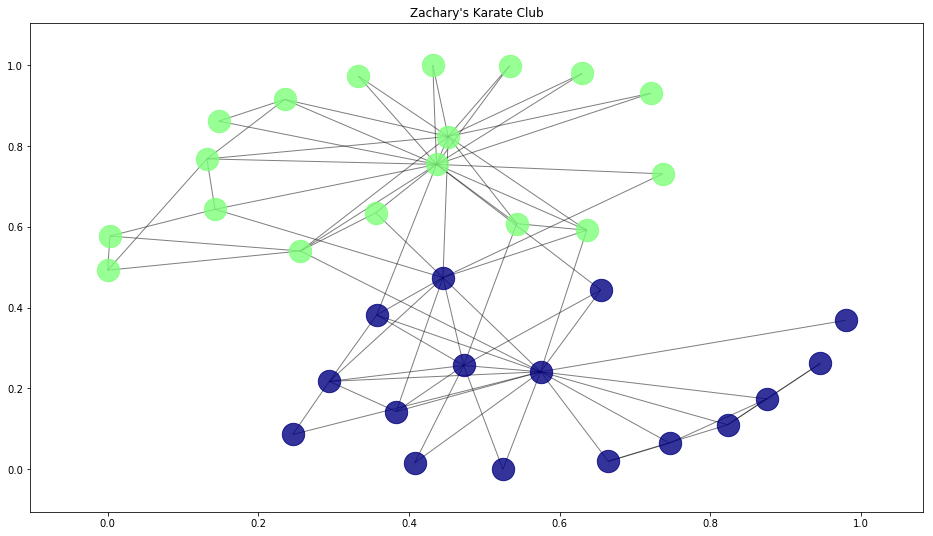

In [524]:
# Make logistic regression model and fit
lr = LogisticRegressionCV(Cs= 20, cv = 3, scoring = 'f1', 
                          penalty = 'l2', random_state = 42)
lr.fit(X, y)

# Make predictions and evaluate
lr_pred = lr.predict(X_test)
calc_metrics(lr_pred, y_test)

In [437]:
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ..., 
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [438]:
k_clusters = 2
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

In [439]:
# Check to see how many cluster the affinity propagation algo thinks there is
cluster_centers_indices = algorithms['affinity'].cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

8


In [440]:
# The resulting clubs
algorithms['affinity'].labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 4, 3, 1, 1, 2, 2, 4, 4, 1, 2, 4, 4, 4, 2, 4,
       6, 5, 5, 6, 3, 3, 6, 4, 5, 7, 7], dtype=int64)

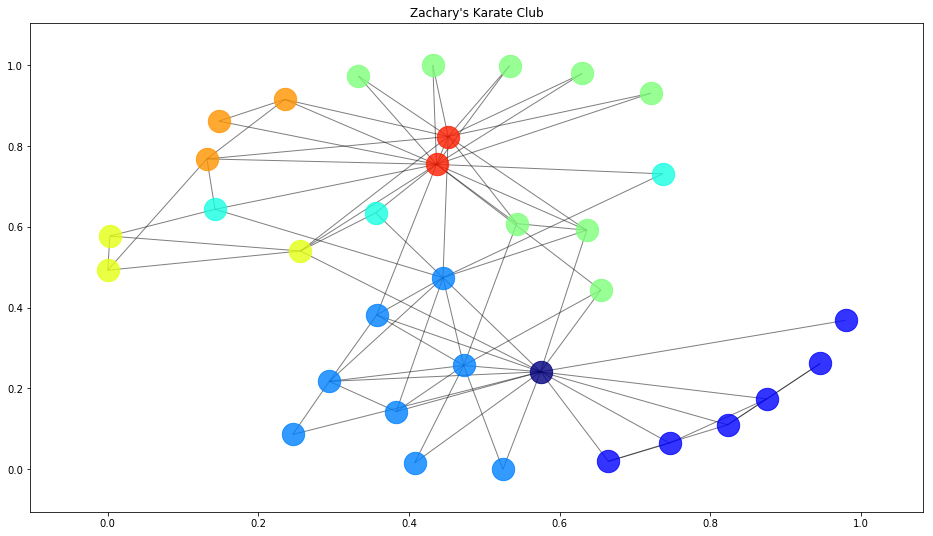

In [525]:
# Need to scale features for support vector classifier
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Create support vector classifier and fit
svc = SVC(C = 10, gamma = 0.001, probability=True,
          random_state = 42)
svc.fit(X_scaled, y)

# Make predictions and evaluate
svc_pred = svc.predict(X_test_scaled)
calc_metrics(svc_pred, y_test)

In [261]:
algorithms['kmeans'].labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [262]:
nmi_results = []
ars_results = []

y_true_val = list(y_true.values()

# Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))

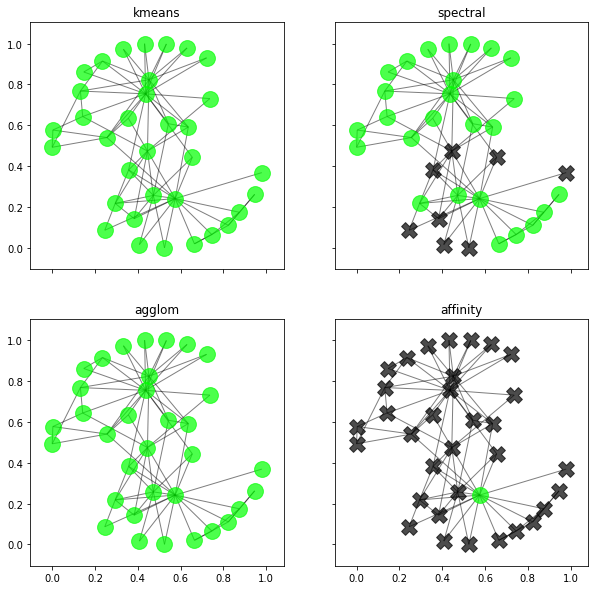

In [354]:
# Create the model in a context
with pm.Model() as logistic_model:
  
    # Build the model using the formula and specify the data likelihood 
    pm.GLM.from_formula(formula, data = X_with_labels, family = pm.glm.families.Binomial())
    
    # Using the no-uturn sampler
    sampler = pm.NUTS()
    
    # Sample from the posterior using NUTS
    trace_log = pm.sample(draws=5000, step = sampler, chains=2, tune=1000, random_seed=100)